In [1]:
from jupyterworkflow.data import get_fremont_data
import pandas as pd

# unit test function using pytest
def test_fremont_data():
    data = get_fremont_data()
    assert all(data.columns == ['West', 'East', 'Total'])
    assert isinstance (data.index, pd.DatetimeIndex)

In [4]:
data = get_fremont_data()

In [5]:
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


In [6]:
data.index.dtype

dtype('<M8[ns]')

In [7]:
test_fremont_data()

### Why is the data running so slow??-Using Pandas

The test_fremont_data function, takes about 10.45secs to run, which is too slow. Next we will try to refactor to speed up the function. Reason, is that we are parsing the dates in the data, and data contain ~38,000 string individually and trying to parse it. The below code is key to making the unit test fast: Thus
1. Add the below modification to data.py
2. Read csv without parsing the dates

In [12]:
data = pd.read_csv ('Fremont.csv', index_col='Date')
try:
    data.index = pd.to_datetime(data.index, format='%m/%d/%Y %H:%M:%S %p')
except TypeError:
    data.index = pd.to_datetime[data.index]
    

In [13]:
#data.index


In [14]:
data.columns =['West', 'East']
data ['Total'] =data['West']+data['East']

In [25]:
import os
from urllib.request import urlretrieve

import pandas as pd
FREMONT_URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

def get_fremont_data(filename='Fremont.csv', url=FREMONT_URL, force_download=False):
    if force_download or not os.path.exists(filename):
        urlretrieve(url,filename)
        
    data = pd.read_csv ('Fremont.csv', index_col='Date')
    try:
        data.index = pd.to_datetime(data.index, format='%m/%d/%Y %I:%M:%S %p')
    except TypeError:
        data.index = pd.to_datetime[data.index]
    
    data.columns =['West', 'East']
    data ['Total'] =data['West']+data['East']
    return data

In [26]:
def get_fremont_data(filename='Fremont.csv', url=FREMONT_URL, force_download=False):
    if force_download or not os.path.exists(filename):
           urlretrieve(url,filename)
    
    
    data = pd.read_csv ('Fremont.csv', index_col='Date', parse_dates=True)
    data.columns =['West', 'East']
    data ['Total'] =data['West']+data['East']
    return data

In [27]:
data = get_fremont_data()

In [28]:
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


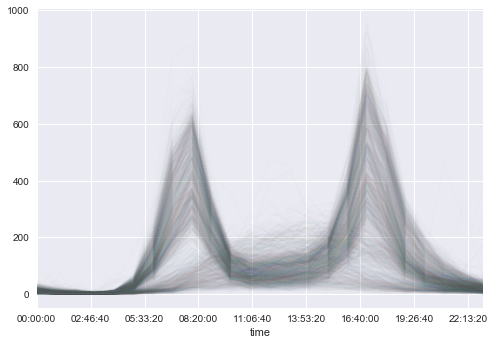

In [29]:
%matplotlib inline
import matplotlib as plt
plt.style.use('seaborn')
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha =0.01);

## Reference:
1. Unit testing -[pytest](http://doc.pytest.org/en/latest/).
2. [Working with dates: python strftime format] (http://strftime.org)